In [ ]:
# Load libraries
# !pip install six
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from six import StringIO  # in place of StringIO
from sklearn.tree import export_graphviz
import pydotplus
# from io import StringIO  # Use io.StringIO directly. No longer supported in versions python 2.4 +
from PIL import Image  # Use PIL or IPython.display.Image for Jupyter Notebooks
from IPython.display import Image  # Optional, for Jupyter



### Load diabetes data
Pima Indians Diabetes Database from [kaggle](https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database?resource=download)
We will follow the tutorial from [Data camp](https://www.datacamp.com/tutorial/decision-tree-classification-python)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
## finding path
# !ls drive/MyDrive/SJSU/SJSU_Fall2024_CS/CS133_Data-Visualization/week10_sql


Colab_Lec14_Python_Relational_DB_SQLite.ipynb  Lec14_sql.gslides


In [ ]:
gdrive='drive/MyDrive/SJSU/SJSU_Fall2024_CS/CS133_Data-Visualization/week12_ml/'
fp=gdrive+'diabetes.csv'

First, we will create a database connection and a cursor to execute SQL commands.

In [ ]:
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
# load dataset
pima = pd.read_csv(fp, header=None, names=col_names)
pima = pima.drop(index=pima.index[0])
pima

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
1,6,148,72,35,0,33.6,0.627,50,1
2,1,85,66,29,0,26.6,0.351,31,0
3,8,183,64,0,0,23.3,0.672,32,1
4,1,89,66,23,94,28.1,0.167,21,0
5,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
764,10,101,76,48,180,32.9,0.171,63,0
765,2,122,70,27,0,36.8,0.34,27,0
766,5,121,72,23,112,26.2,0.245,30,0
767,1,126,60,0,0,30.1,0.349,47,1


**Feature Selection**  
Divide given columns into two types of variables dependent(or target variable) and independent variable(or feature variables).

In [ ]:
#split dataset in features and target variable
# 'pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
feature_cols = ['pregnant', 'insulin', 'bmi', 'age','glucose','bp','pedigree']
X = pima[feature_cols] # Features
y = pima.label # Target variable


**Splitting Data**  
To understand model performance, dividing the dataset into a training set and a test set is a good strategy.
  
Let's split the dataset by using the function train_test_split(). You need to pass three parameters features; target, and test_set size.




In [ ]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test


**Building Decision Tree Model**  
Let's create a decision tree model using Scikit-learn.

In [ ]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)


**Evaluating the Model**  
Let's estimate how accurately the classifier or model can predict the type of cultivars. Accuracy can be computed by comparing actual test set values and predicted values.

Accuracy found classification rate of 67.53%, which is considered as good accuracy. You can improve this accuracy by tuning the parameters in the decision tree algorithm.

In [ ]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


Accuracy: 0.6623376623376623


**Visualizing Decision Trees**  
You can use Scikit-learn's export_graphviz function for display the tree within a Jupyter notebook.

Steps:
- Created a StringIO object called dot_data to hold the text representation of the decision tree.
- Exported the decision tree to the dot format using the export_graphviz function and write the output to the dot_data buffer.
- Created a pydotplus graph object from the dot format representation of the decision tree stored in the dot_data buffer.
- Written the generated graph to a PNG file named "diabetes.png".
- Displayed the generated PNG image of the decision tree using the Image object from the IPython.display module.


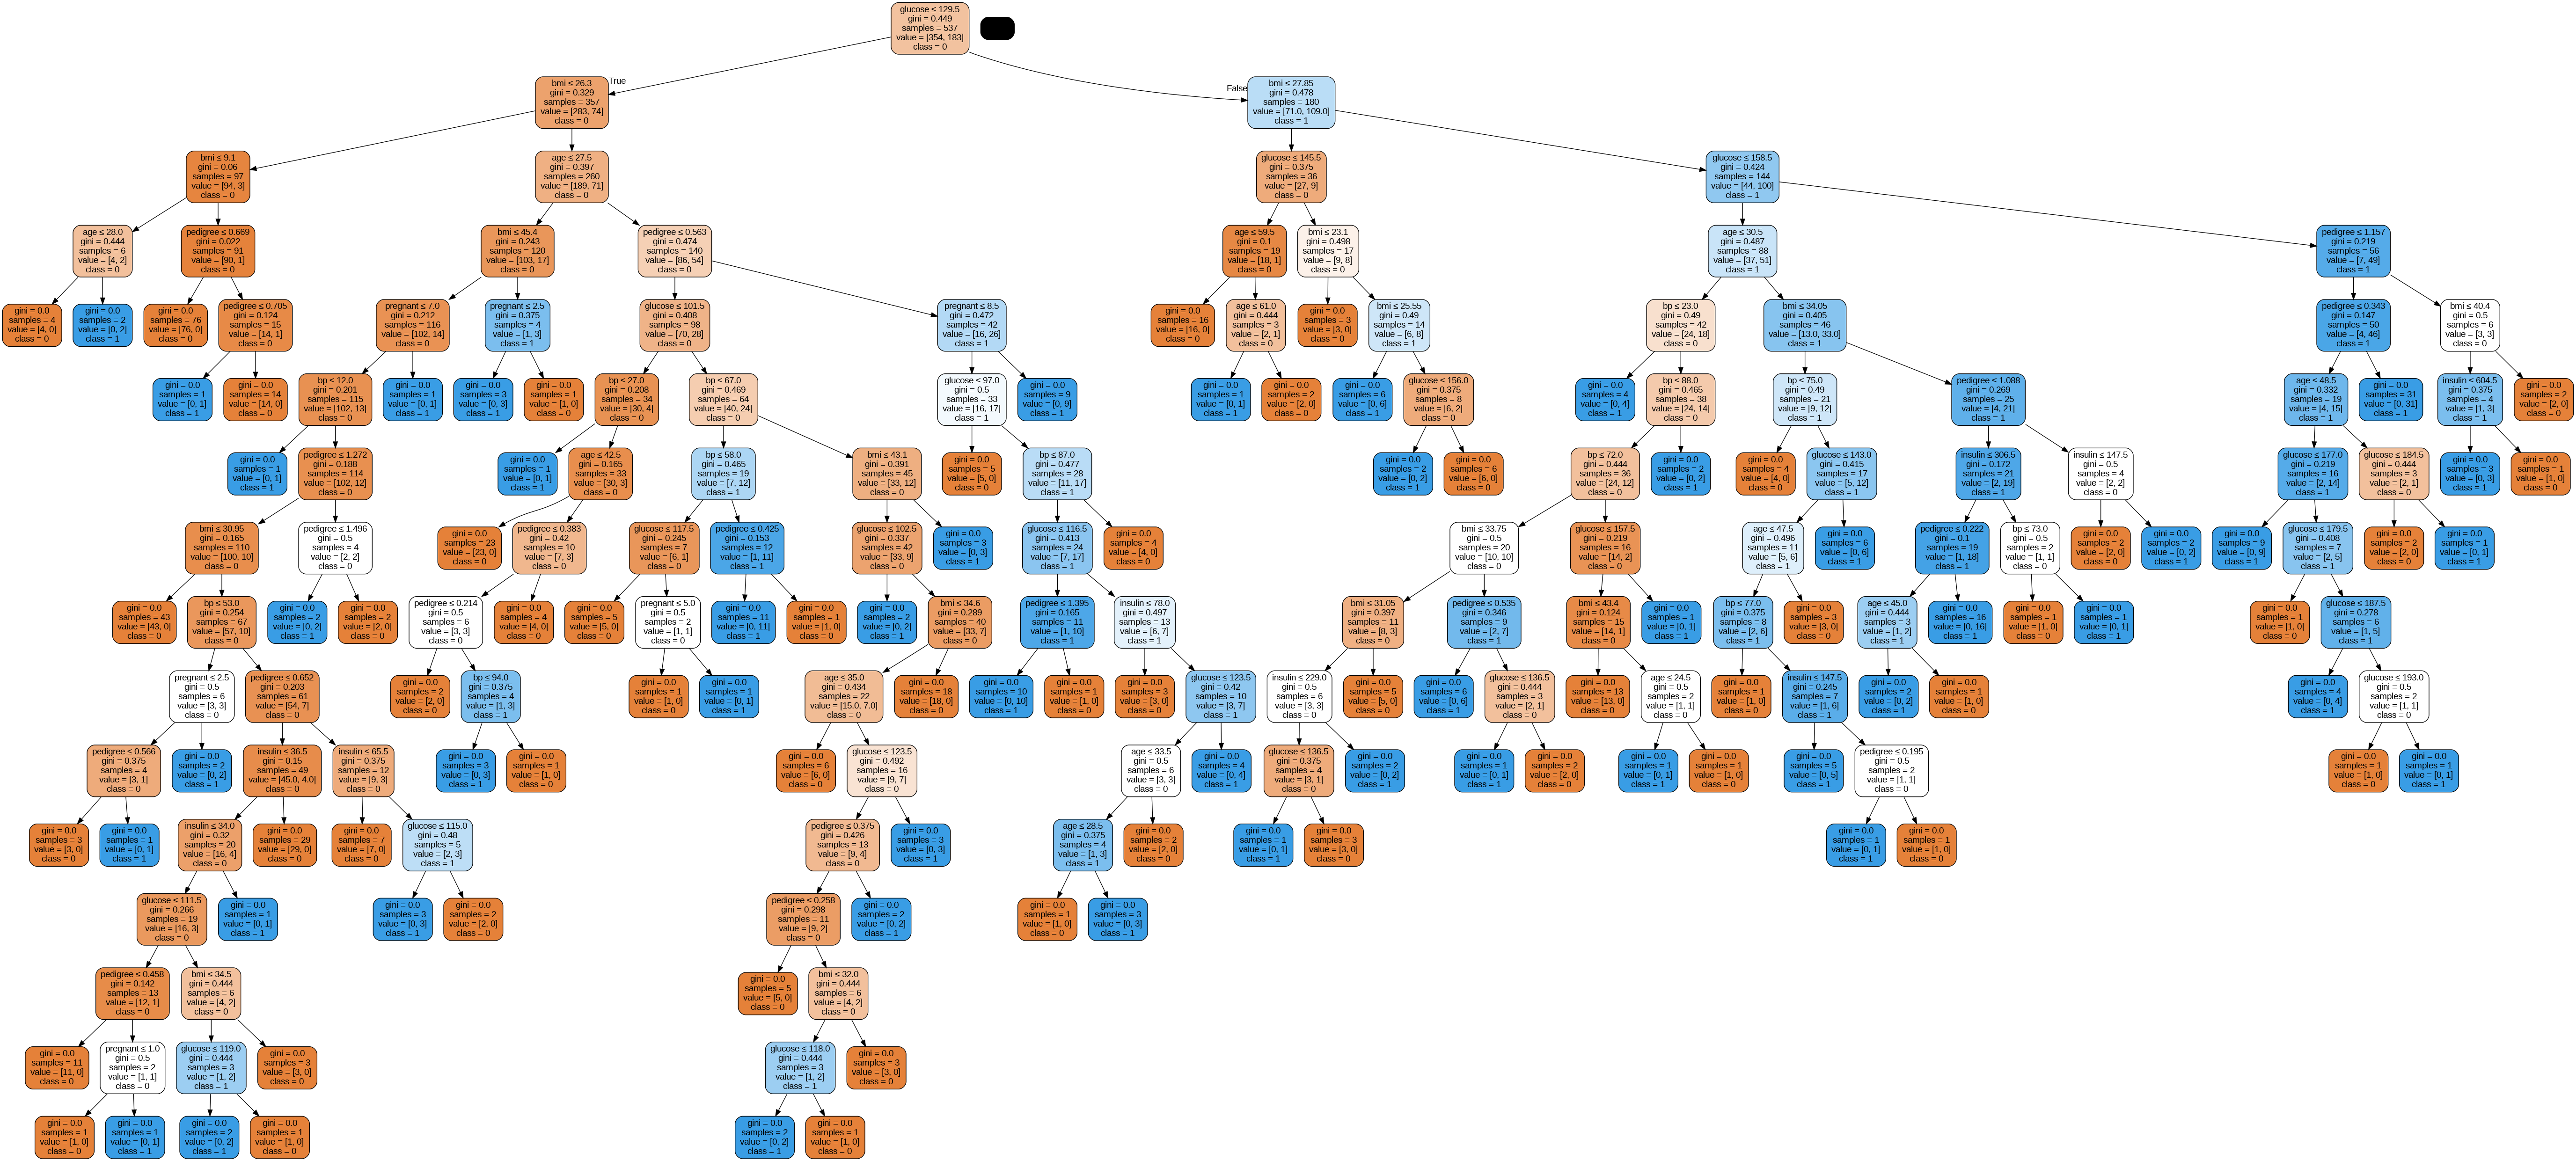

In [ ]:
# Assuming clf is your trained classifier and feature_cols is a list of feature names
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True, feature_names=feature_cols, class_names=['0', '1'])

# Create graph from the dot data
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

# Save the graph as a PNG file
graph.write_png('diabetes.png')

# Display the image
Image(filename='diabetes.png')  # For Jupyter or displaying in notebook

**Optimizing Decision Tree Performance**  
*criterion* : optional (default=”gini”) or Choose attribute selection measure. This parameter allows us to use the different-different attribute selection measure. Supported criteria are “gini” for the Gini index and “entropy” for the information gain.

*splitter* : string, optional (default=”best”) or Split Strategy. This parameter allows us to choose the split strategy. Supported strategies are “best” to choose the best split and “random” to choose the best random split.

*max_depth *: int or None, optional (default=None) or Maximum Depth of a Tree. The maximum depth of the tree. If None, then nodes are expanded until all the leaves contain less than min_samples_split samples. The higher value of maximum depth causes overfitting, and a lower value causes underfitting (Source).

In Scikit-learn, optimization of decision tree classifier performed by only pre-pruning. Maximum depth of the tree can be used as a control variable for pre-pruning. In the following the example, you can plot a decision tree on the same data with max_depth=3. Other than pre-pruning parameters, You can also try other attribute selection measure such as entropy.

In [ ]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


Accuracy: 0.7705627705627706


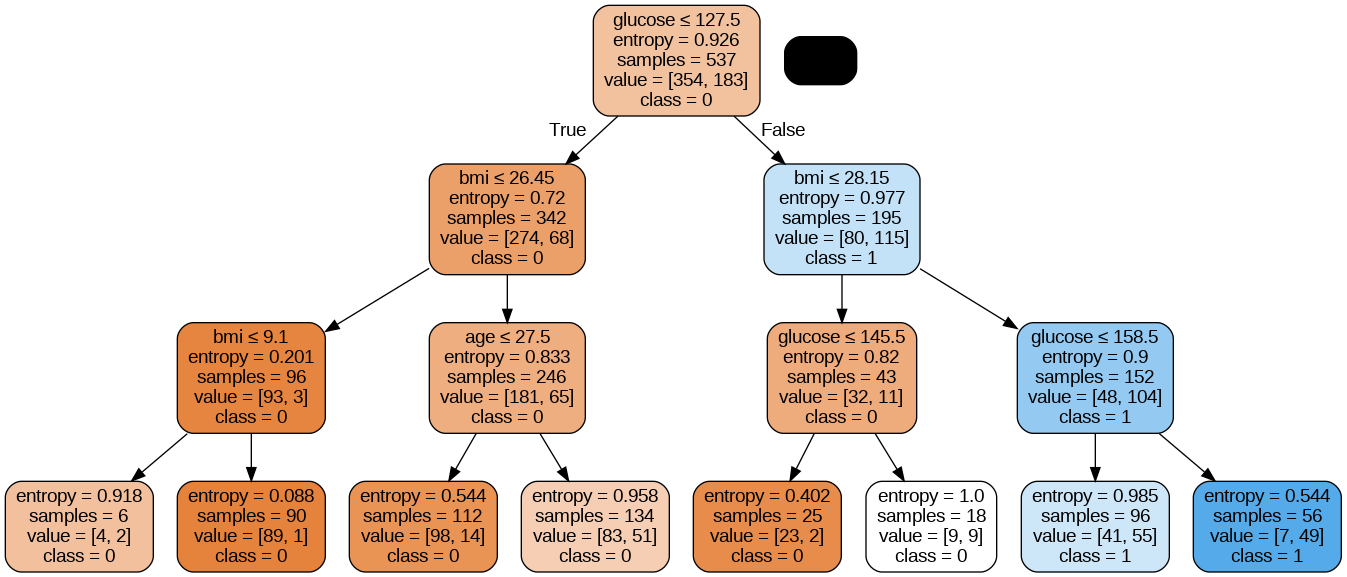

In [ ]:
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True, feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('diabetes.png')
Image(graph.create_png())